In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
sys.path.append('..')
import myd2l

In [12]:
class DeepRNN(nn.Module):
    def __init__(self, vocab_size, num_hiddens, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.rnn = nn.RNN(vocab_size, num_hiddens, num_layers)
        self.fc = nn.Linear(num_hiddens, vocab_size)
    
    def forward(self, X, state):
        X = F.one_hot(X.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        Y = self.fc(Y).reshape((-1, self.vocab_size))

        return Y, state

    def begin_state(self, batch_size, device):
        return torch.zeros(size=(self.num_layers, batch_size, self.num_hiddens), dtype=torch.float32, device=device)


epoch 10, perplexity 11.0
time travellere the the the the the the the the the the the the 
epoch 20, perplexity 9.0
time traveller the thin thin thin tome time time time time time 
epoch 30, perplexity 7.9
time travellereathe andithe andithe manelathe thaverisinesaichth
epoch 40, perplexity 7.0
time travellerisisifally the grace andineraicenisthe the thate a
epoch 50, perplexity 5.3
time traveller that in this this this this this this this this t
epoch 60, perplexity 4.1
time traveller tha fare that is alle thing as mand the groul and
epoch 70, perplexity 3.0
time traveller than ther way has in and sand the painet mave is 
epoch 80, perplexity 2.3
time traveller to the other dimensions of space here is a portla
epoch 90, perplexity 1.8
time travellerit s agle the merical man a kuite tlansthat uracer
epoch 100, perplexity 1.5
time travellerit s aglest on veatenged andtint arovit invelinnt 
epoch 110, perplexity 1.4
time traveller frountt at must theeed and uf ut wall the three d
epoch 1

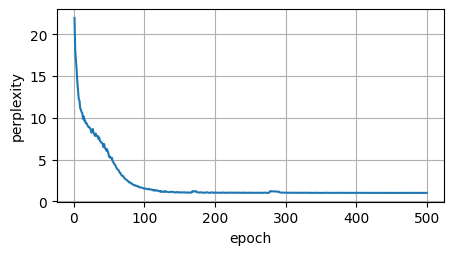

perplexity 1.0, 353417.1 examples/sec on cuda
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


In [ ]:
batch_size, num_steps = 32, 35
train_iter, vocab = myd2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
net = DeepRNN(vocab_size, num_hiddens, num_layers)

num_epochs, lr = 500, 1
device = torch.device('cuda')
myd2l.train_lm(net, train_iter, vocab, lr, num_epochs, device)

epoch 10, perplexity 17.3
time traveller                                                  
epoch 20, perplexity 15.8
time traveller te a a a a a a a a a a a a a a a a a a a a a a a 
epoch 30, perplexity 13.3
time travellerete the the the the the the the the the the the th
epoch 40, perplexity 11.4
time traveller th the th the th the th the th the th the th the 
epoch 50, perplexity 10.5
time traveller an the the the the the the the the the the the th
epoch 60, perplexity 9.9
time travellerererererererererererererererererererererererererer
epoch 70, perplexity 9.3
time traveller the the the the the the the the the the the the t
epoch 80, perplexity 8.8
time traveller and the the the the the the the the the the the t
epoch 90, perplexity 8.3
time traveller and the the the the the the the the the the the t
epoch 100, perplexity 7.9
time traveller the the the the the the the the the the the the t
epoch 110, perplexity 7.4
time traveller the the the the the the the the the the the the t
epo

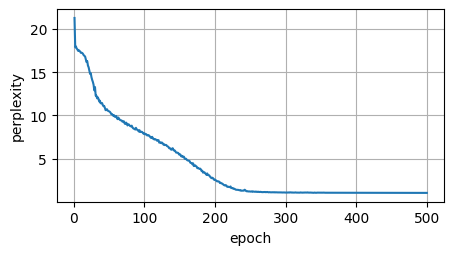

perplexity 1.0, 218180.7 examples/sec on cuda
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


In [ ]:
# Deep GRU

class DeepGRU(nn.Module):
    def __init__(self, vocab_size, num_hiddens, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.gru = nn.GRU(vocab_size, num_hiddens, num_layers)
        self.fc = nn.Linear(num_hiddens, vocab_size)
    
    def forward(self, X, state):
        X = F.one_hot(X.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.gru(X, state)
        Y = self.fc(Y).reshape((-1, self.vocab_size))

        return Y, state

    def begin_state(self, batch_size, device):
        return torch.zeros(size=(self.num_layers, batch_size, self.num_hiddens), dtype=torch.float32, device=device)
    
batch_size, num_steps = 32, 35
train_iter, vocab = myd2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
net = DeepGRU(vocab_size, num_hiddens, num_layers)

num_epochs, lr = 500, 1
device = torch.device('cuda')
myd2l.train_lm(net, train_iter, vocab, lr, num_epochs, device)

epoch 10, perplexity 17.5
time traveller                                                  
epoch 20, perplexity 17.4
time traveller                                                  
epoch 30, perplexity 17.4
time traveller                                                  
epoch 40, perplexity 17.4
time traveller                                                  
epoch 50, perplexity 17.2
time traveller   t e  t e  t e  t e  t e  t e  t e  t e  t e  t 
epoch 60, perplexity 16.7
time traveller te ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae a
epoch 70, perplexity 16.0
time traveller at ae ae ae ae ae ae ae ae ae ae ae ae ae ae ae a
epoch 80, perplexity 15.4
time travellerttee aae aae aae aae aae aae aae aae aae aae aae a
epoch 90, perplexity 14.5
time traveller aa ae tae tae tae tae tae tae tae tae tae tae tae
epoch 100, perplexity 13.2
time travellere the the the the the the the the the the the the 
epoch 110, perplexity 12.0
time traveller the the the the the the the the the the the the

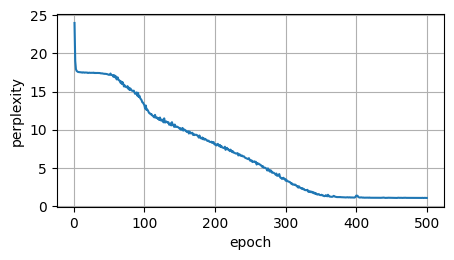

perplexity 1.0, 202687.9 examples/sec on cuda
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


In [ ]:
# Deep LSTM

class DeepLSTM(nn.Module):
    def __init__(self, vocab_size, num_hiddens, num_layers):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.lstm = nn.LSTM(vocab_size, num_hiddens, num_layers)
        self.fc = nn.Linear(num_hiddens, vocab_size)
    
    def forward(self, X, state):
        X = F.one_hot(X.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.lstm(X, state)
        Y = self.fc(Y).reshape((-1, self.vocab_size))

        return Y, state

    def begin_state(self, batch_size, device):
        return (
            torch.zeros(size=(self.num_layers, batch_size, self.num_hiddens), dtype=torch.float32, device=device),
            torch.zeros(size=(self.num_layers, batch_size, self.num_hiddens), dtype=torch.float32, device=device)
        )
    
batch_size, num_steps = 32, 35
train_iter, vocab = myd2l.load_data_time_machine(batch_size, num_steps)

vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
net = DeepLSTM(vocab_size, num_hiddens, num_layers)

num_epochs, lr = 500, 1
device = torch.device('cuda')
myd2l.train_lm(net, train_iter, vocab, lr, num_epochs, device)